In [1]:
# load dependencies
from matplotlib import pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
import scipy.stats as st
import seaborn as sns

In [2]:
# read in files
happiness_2018_index = pd.read_csv('../Data/happiness_index_2018.csv')
alcohol_consumption = pd.read_csv('../Data/alcohol_consumption.csv')
consumption_type = pd.read_csv('../Data/drinks_csv.csv')
gdp = pd.read_csv('../Data/gdp.csv')

# merge csv files
df = pd.merge(happiness_2018_index, alcohol_consumption, on='Country', how='outer')
df = pd.merge(df, consumption_type, on='Country', how='outer')
df = pd.merge(df, gdp, on='Country', how='outer')


# check the file has been read in
df

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code_x,...,con,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,Country Code_y,Indicator Name_y,2018_y,2019,2020
0,1.0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,FIN,...,finland,263.0,133.0,97.0,10.0,FIN,GDP per capita (current US$),50030.87731,48782.78848,NaN
1,2.0,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,NOR,...,norway,169.0,71.0,129.0,6.7,NOR,GDP per capita (current US$),81734.46557,75419.63487,NaN
2,3.0,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,DNK,...,denmark,224.0,81.0,278.0,10.4,DNK,GDP per capita (current US$),61598.53670,60170.34264,NaN
3,4.0,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,ISL,...,iceland,233.0,61.0,78.0,6.6,ISL,GDP per capita (current US$),72968.70423,66944.83308,NaN
4,5.0,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,CHE,...,switzerland,185.0,100.0,280.0,10.2,CHE,GDP per capita (current US$),82818.10816,81993.72713,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,NaN,St. Kitts & Nevis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,st. kitts & nevis,194.0,205.0,32.0,7.7,NaN,NaN,NaN,NaN,NaN
296,NaN,St. Vincent & The Grenadines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,st. vincent & the grenadines,120.0,221.0,11.0,6.3,NaN,NaN,NaN,NaN,NaN
297,NaN,Sao Tome & Principe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,sao tome & principe,56.0,38.0,140.0,4.2,NaN,NaN,NaN,NaN,NaN
298,NaN,Swaziland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,swaziland,90.0,2.0,2.0,4.7,NaN,NaN,NaN,NaN,NaN


In [3]:
# clean dataframe with only the relevant data
df = df[['Country', 'Country Code_x', 'Score', '2018_y',"Social support", 'Healthy life expectancy', "Freedom to make life choices",
         'Generosity', 'Perceptions of corruption','2018_x', 'beer_servings', 'spirit_servings', 'wine_servings']]

# check dataframe for any errors
df = df.dropna()

# rename columns

df =df.rename(columns={"Country Code_x": "con_code", 
                       "2018_y": "GDP", 
                       "Social support": "social",
                       "Healthy life expectancy": "life_expectancy",
                       "Freedom to make life choices": "freedom",
                       'Perceptions of corruption': "corruption",
                       "2018_x": "alcohol_consumption"
                      })

df

,Country,con_code,Score,GDP,social,life_expectancy,freedom,Generosity,corruption,alcohol_consumption,beer_servings,spirit_servings,wine_servings
0,Finland,FIN,7.632,50030.877310,1.592,0.874,0.681,0.202,0.393,10.78,263.0,133.0,97.0
1,Norway,NOR,7.594,81734.465570,1.582,0.861,0.686,0.286,0.340,7.41,169.0,71.0,129.0
2,Denmark,DNK,7.555,61598.536700,1.590,0.868,0.683,0.284,0.408,10.26,224.0,81.0,278.0
3,Iceland,ISL,7.495,72968.704230,1.644,0.914,0.677,0.353,0.138,9.12,233.0,61.0,78.0
4,Switzerland,CHE,7.487,82818.108160,1.549,0.927,0.660,0.256,0.357,11.53,185.0,100.0,280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Liberia,LBR,3.495,677.322179,0.858,0.267,0.419,0.206,0.030,6.12,19.0,152.0,2.0
150,Rwanda,RWA,3.408,783.287184,0.896,0.400,0.636,0.200,0.444,8.95,43.0,2.0,0.0
152,Tanzania,TZA,3.303,1060.994615,0.991,0.381,0.481,0.270,0.097,11.27,36.0,6.0,1.0
154,Central African Republic,CAF,3.083,475.953610,0.000,0.010,0.305,0.218,0.038,2.38,17.0,2.0,1.0


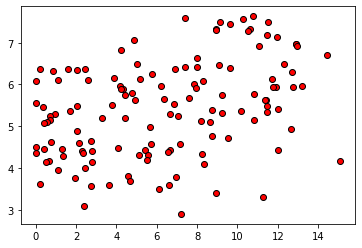

<Figure size 432x288 with 0 Axes>

In [4]:
# data check to see if this is an interesting enough correlation to explore
alcohol_c = df["alcohol_consumption"]
score = df['Score']

# create and format plot
plt.scatter(alcohol_c, score, marker="o", facecolors="red", edgecolors="black")

# show plot
plt.show()
plt.tight_layout()


In [5]:
# calculating correlation score

corr = st.pearsonr(alcohol_c,score)

corr

(0.3758774254138273, 9.67859754531169e-06)

In [6]:
df.describe()

,Score,GDP,social,life_expectancy,freedom,Generosity,corruption,alcohol_consumption,beer_servings,spirit_servings,wine_servings
count,131.000000,131.000000,131.000000,131.000000,131.00000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,5.422092,15791.846495,1.231267,0.600313,0.46713,0.180229,0.115412,6.334557,117.389313,79.450382,58.839695
std,1.139894,21799.084921,0.298215,0.246425,0.16059,0.101551,0.099659,4.098736,106.791499,78.277732,87.419221
min,2.905000,271.752044,0.000000,0.000000,0.00000,0.000000,0.000000,0.003000,0.000000,0.000000,0.000000
25%,4.444000,1691.045486,1.095500,0.420500,0.37750,0.109000,0.051500,2.525000,22.000000,6.000000,1.000000
50%,5.472000,6295.935399,1.281000,0.666000,0.50300,0.171000,0.082000,6.380000,79.000000,69.000000,9.000000
75%,6.285000,19750.240755,1.467000,0.783000,0.58450,0.240000,0.140000,9.565000,209.500000,120.000000,95.500000
max,7.632000,116654.261100,1.644000,1.008000,0.72400,0.598000,0.457000,15.090000,376.000000,373.000000,370.000000


In [7]:
happyCountries = df[(df.Score > 7)]

happyCountries.describe()

,Score,GDP,social,life_expectancy,freedom,Generosity,corruption,alcohol_consumption,beer_servings,spirit_servings,wine_servings
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,7.372538,54618.153715,1.542154,0.885615,0.643538,0.284077,0.284846,9.692308,217.538462,88.846154,163.230769
std,0.177600,18490.380694,0.062055,0.028745,0.057912,0.064976,0.114106,1.928022,43.068967,24.354487,77.639288
min,7.072000,12112.134420,1.433000,0.817000,0.464000,0.143000,0.082000,4.870000,149.000000,60.000000,11.000000
25%,7.272000,46313.171370,1.501000,0.874000,0.638000,0.256000,0.224000,8.940000,185.000000,72.000000,100.000000
50%,7.328000,53044.532440,1.549000,0.888000,0.659000,0.285000,0.302000,10.260000,224.000000,81.000000,186.000000
75%,7.495000,61598.536700,1.590000,0.910000,0.677000,0.333000,0.383000,10.780000,251.000000,100.000000,195.000000
max,7.632000,82818.108160,1.644000,0.927000,0.686000,0.365000,0.408000,11.960000,279.000000,133.000000,280.000000


In [8]:
sadCountries = df[(df.Score < 4)]

sadCountries.describe()

,Score,GDP,social,life_expectancy,freedom,Generosity,corruption,alcohol_consumption,beer_servings,spirit_servings,wine_servings
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,3.574467,1476.041149,0.796400,0.262133,0.332133,0.180200,0.100867,4.720667,54.600000,43.666667,7.666667
std,0.303548,2026.281525,0.325643,0.117467,0.205329,0.082082,0.098754,3.093393,63.683144,87.346328,14.074631
min,2.905000,271.752044,0.000000,0.010000,0.000000,0.042000,0.030000,0.210000,0.000000,0.000000,0.000000
25%,3.451500,510.625872,0.584000,0.229500,0.153000,0.140500,0.055000,2.420000,13.000000,2.000000,0.500000
50%,3.590000,783.287184,0.858000,0.267000,0.406000,0.185000,0.092000,4.590000,36.000000,11.000000,1.000000
75%,3.784500,1328.617759,1.042500,0.343500,0.457500,0.208000,0.100000,6.765000,73.000000,32.000000,4.000000
max,3.999000,8279.601739,1.215000,0.417000,0.636000,0.392000,0.444000,11.270000,217.000000,326.000000,45.000000


### CREATE DATABASE CONNECTION

In [9]:
#create connection
import psycopg2

Load Data into Postgres

In [10]:
# create params_dic
param_dic = {
    "host"      : "",
    "database"  : "",
    "user"      : "",
    "password"  : ""
}

In [11]:
# set up connection
connect = "postgresql+psycopg2://%s:%s@%s:5432/%s"%(
    param_dic['user'],
    param_dic['password'],
    param_dic['host'],
    param_dic['database']
)

engine = create_engine(connect)

In [12]:
# def to_alchemy(df):
#     """
#     Reading table into postgres
#     """
# df.to_sql(
#         'df', 
#         con=engine, 
#         index=False, 
#         if_exists='replace'
#     )
# print("to_sql() done (sqlalchemy)")

to_sql() done (sqlalchemy)


In [13]:
conn = engine.connect()

results = conn.execute('Select * from df')


In [14]:
all_countries = []
 
for country, con_code, score, gdp, social, health, freedom, generosity, corruption, alcohol, beer_servings, wine_servings, spirit_servings in results:
    print(country)
    countries_dict = {}
    countries_dict["Country"] = country
    countries_dict["Country Code"] = con_code
    countries_dict["Score"] = score
    countries_dict["GDP per capita"] = gdp
    countries_dict["Social support"] = social
    countries_dict["Health life expectancy"] = health
    countries_dict["Freedom to make life choices"] = freedom
    countries_dict["Generosity"] = generosity
    countries_dict["Perceptions of corruption"] = corruption
    countries_dict["Alcohol Consumption per Capita (liter)"] = alcohol
    countries_dict["beer_servings"] = beer_servings
    countries_dict["wine_servings"] = wine_servings
    countries_dict["spirit_servings"] = beer_servings
    all_countries.append(countries_dict)



print(all_countries)

Finland
Norway
Denmark
Iceland
Switzerland
Netherlands
Canada
New Zealand
Sweden
Australia
United Kingdom
Austria
Costa Rica
Ireland
Germany
Belgium
Luxembourg
Israel
Czech Republic
Malta
France
Mexico
Chile
Panama
Brazil
Argentina
Guatemala
Uruguay
Qatar
Saudi Arabia
Singapore
Malaysia
Spain
Colombia
El Salvador
Nicaragua
Poland
Bahrain
Uzbekistan
Kuwait
Thailand
Italy
Ecuador
Belize
Lithuania
Slovenia
Romania
Latvia
Japan
Mauritius
Jamaica
Kazakhstan
Cyprus
Bolivia
Estonia
Paraguay
Peru
Moldova
Turkmenistan
Hungary
Libya
Philippines
Honduras
Belarus
Turkey
Pakistan
Portugal
Serbia
Greece
Lebanon
Montenegro
Croatia
Dominican Republic
Algeria
Morocco
China
Azerbaijan
Tajikistan
Jordan
Nigeria
Mongolia
Vietnam
Indonesia
Bhutan
Cameroon
Bulgaria
Nepal
Gabon
South Africa
Ghana
Senegal
Tunisia
Albania
Sierra Leone
Bangladesh
Sri Lanka
Iraq
Mali
Namibia
Cambodia
Burkina Faso
Mozambique
Kenya
Zambia
Mauritania
Ethiopia
Georgia
Armenia
Myanmar
Chad
India
Niger
Uganda
Benin
Sudan
Ukraine
Togo


In [16]:
df.to_csv('../Data/df.csv', index = False, header=True)

In [15]:
df.head()

,Country,con_code,Score,GDP,social,life_expectancy,freedom,Generosity,corruption,alcohol_consumption,beer_servings,spirit_servings,wine_servings
0,Finland,FIN,7.632,50030.87731,1.592,0.874,0.681,0.202,0.393,10.78,263.0,133.0,97.0
1,Norway,NOR,7.594,81734.46557,1.582,0.861,0.686,0.286,0.340,7.41,169.0,71.0,129.0
2,Denmark,DNK,7.555,61598.53670,1.590,0.868,0.683,0.284,0.408,10.26,224.0,81.0,278.0
3,Iceland,ISL,7.495,72968.70423,1.644,0.914,0.677,0.353,0.138,9.12,233.0,61.0,78.0
4,Switzerland,CHE,7.487,82818.10816,1.549,0.927,0.660,0.256,0.357,11.53,185.0,100.0,280.0
